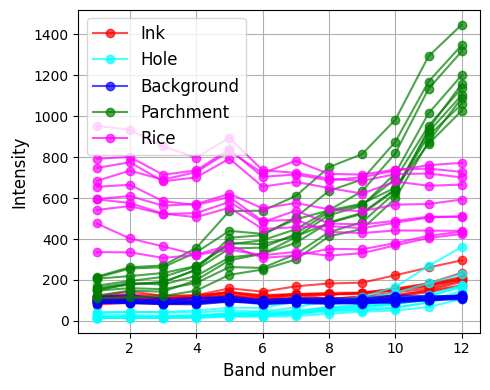

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing cropped band images
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Define coordinate points for each region
regions_coordinates = {
    "Ink": [(1720, 1890), (1500, 1900), (2000, 1890), (1900, 2170), (2000, 1600), (1750, 1900),
            (1700, 2150), (1600, 2270), (1900, 2420), (1800, 2680)],
    "Hole": [(500, 2775), (505, 2777), (1310, 1330), (1305, 1340), (1330, 1400), (2280, 1500),
          (2300, 1530), (2300, 1545), (2275, 825), (2275, 840)],
    "Background": [(2700, 2200), (800, 2700), (100, 2000), (700, 1200), (1400, 800), (2400, 300),
                (500, 500), (300, 1500), (100, 2500), (1000, 2800)],
    "Parchment": [(1700, 2600), (2400, 2000), (1700, 2800), (1500, 2600), (1100, 1500), (1700, 1200),
                  (1300, 1200), (2800, 1200), (2400, 1700), (2300, 2200)],
    "Rice": [(2300, 800), (2516, 905), (1900, 800), (1400, 1200), (666, 1580), (1340, 2455),
             (1400, 2400), (430, 2415), (345, 2890), (1300, 2100)]
}

# Extract the band numbers and sort them
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Define colors for each region
region_colors = {
    "Ink": 'red',
    "Hole": 'cyan',
    "Background": 'blue',
    "Parchment": 'green',
    "Rice": 'magenta'
}

# Plot intensity trends for each coordinate without averaging
plt.figure(figsize=(5,4))

for region, coordinates in regions_coordinates.items():
    color = region_colors[region]
    label_shown = False  # Track if the label for the region has been shown
    for coord_index, (x, y) in enumerate(coordinates):
        pixel_intensity_trends = [bands[f"band_{band_number:03}"][y, x] for band_number in band_numbers]
        if not label_shown:
            plt.plot(band_numbers, pixel_intensity_trends, label=region, marker='o', color=color, alpha=0.7)
            label_shown = True  # Ensure label is only shown once
        else:
            plt.plot(band_numbers, pixel_intensity_trends, marker='o', color=color, alpha=0.7)

plt.xlabel('Band number', fontsize='larger')
plt.ylabel('Intensity', fontsize='larger')
#plt.xticks(band_numbers,fontsize='larger')  # Ensure all band numbers are shown on the x-axis
plt.legend(loc='upper left', fontsize='larger')  # Adjust legend for readability
plt.grid(True)
plt.tight_layout()
plt.savefig('five_regions_ms_trends.png', dpi=300, format='png')
plt.show()


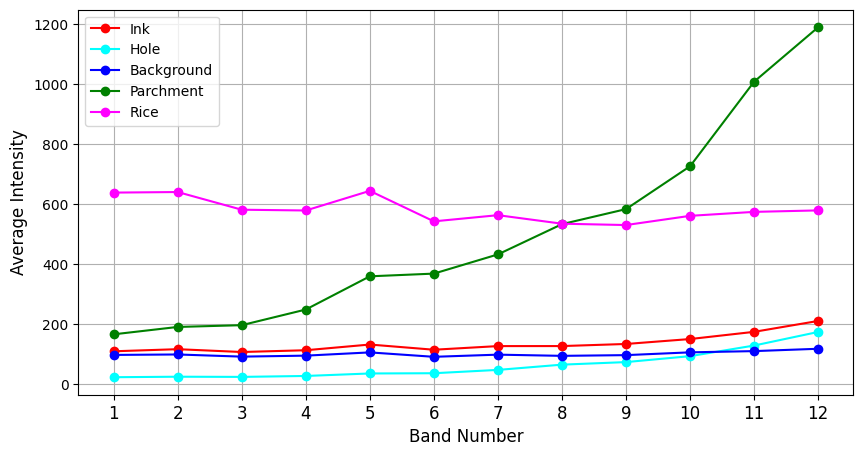

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing cropped band images
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Define coordinate points for each region
regions_coordinates = {
    "Ink": [(1720, 1890), (1500, 1900), (2000, 1890), (1900, 2170), (2000, 1600), (1750, 1900),
            (1700, 2150), (1600, 2270), (1900, 2420), (1800, 2680)],
    "Hole": [(500, 2775), (505, 2777), (1310, 1330), (1305, 1340), (1330, 1400), (2280, 1500),
          (2300, 1530), (2300, 1545), (2275, 825), (2275, 840)],
    "Background": [(2700, 2200), (800, 2700), (100, 2000), (700, 1200), (1400, 800), (2400, 300),
                (500, 500), (300, 1500), (100, 2500), (1000, 2800)],
    "Parchment": [(1700, 2600), (2400, 2000), (1700, 2800), (1500, 2600), (1100, 1500), (1700, 1200),
                  (1300, 1200), (2800, 1200), (2400, 1700), (2300, 2200)],
    "Rice": [(2300, 800), (2516, 905), (1900, 800), (1400, 1200), (666, 1580), (1340, 2455),
             (1400, 2400), (430, 2415), (345, 2890), (1300, 2100)]
    #"Dark": [(1175, 840), (1555, 999), (1775, 911), (3070, 965), (2540, 2165), (2625, 1475),
    #         (2005, 865), (2910, 1350), (2530, 2045), (2600, 1710)]
}

# Extract the band numbers and sort them
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Calculate average intensity trends for each region
region_trends = {region: [] for region in regions_coordinates.keys()}

for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    band_image = bands[band_key]
    for region, coordinates in regions_coordinates.items():
        pixel_values = [band_image[y, x] for (x, y) in coordinates]  # Extract pixel values at given coordinates
        average_intensity = np.mean(pixel_values)
        region_trends[region].append(average_intensity)

# Define colors for each region
region_colors = {
    "Ink": 'red',
    "Hole": 'cyan',
    "Background": 'blue',
    "Parchment": 'green',
    "Rice": 'magenta'
}

# Plot the trends for each region
plt.figure(figsize=(10,5))
for region, trends in region_trends.items():
    plt.plot(band_numbers, trends, label=region, color=region_colors[region], marker='o')

plt.xlabel('Band Number', fontsize='larger')
plt.ylabel('Average Intensity', fontsize='larger')
plt.xticks(band_numbers, fontsize='larger')  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()


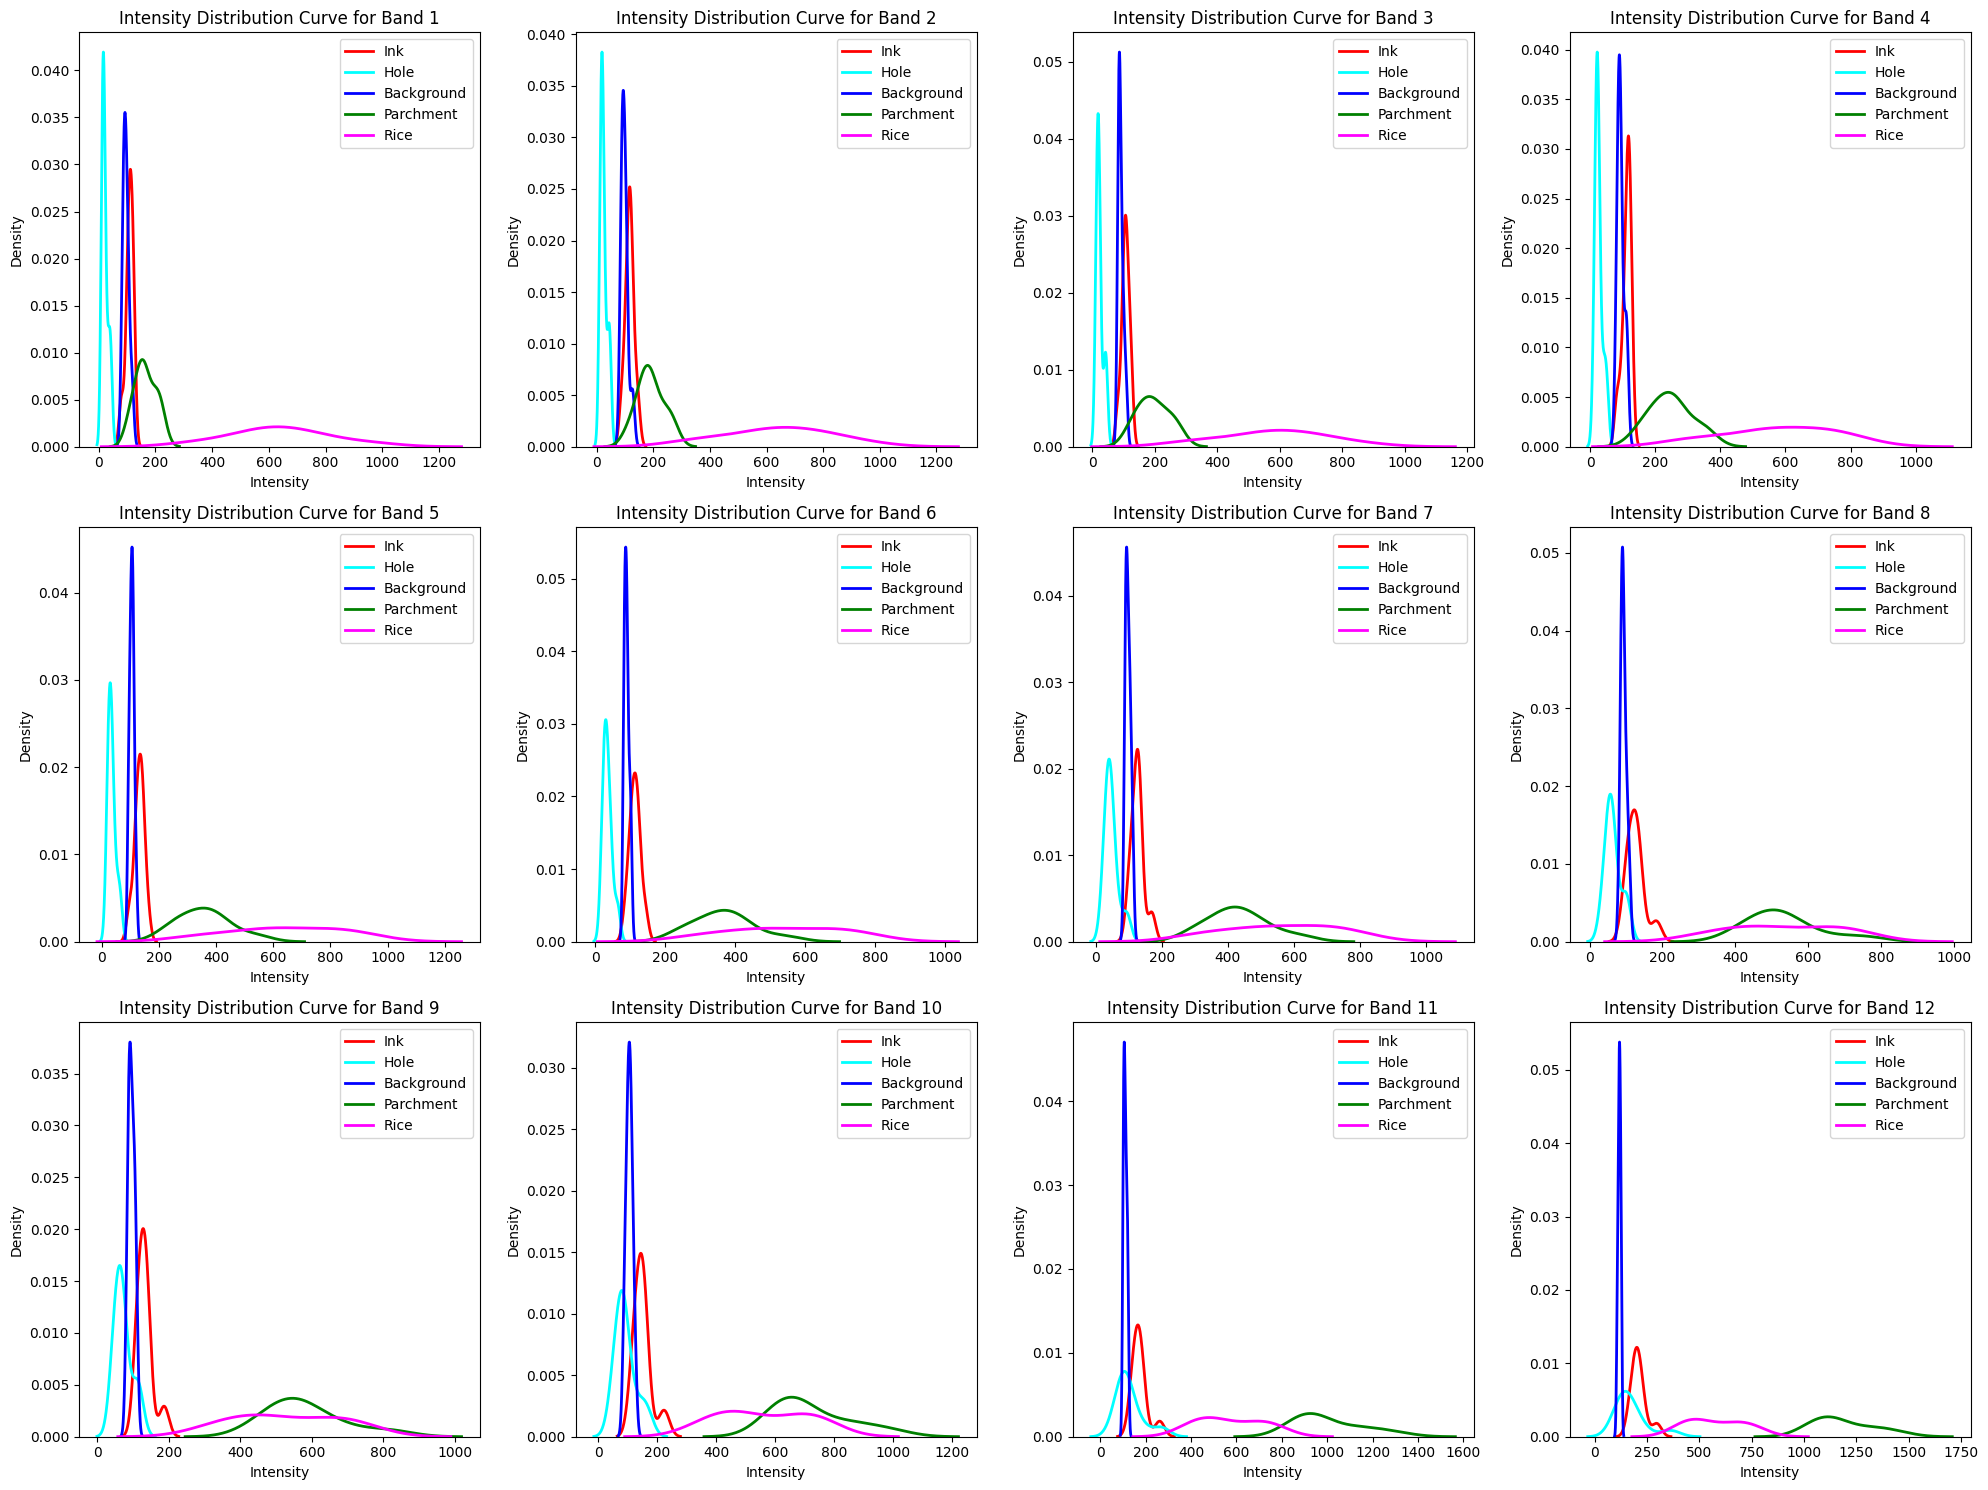

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select all regions to plot and their corresponding colors
selected_regions = {
    "Ink": 'red',
    "Hole": 'cyan',
    "Background": 'blue',
    "Parchment": 'green',
    "Rice": 'magenta'
}

# Create subplots for each band to show the intensity curves
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Plot the intensity distribution curves for each band
for i, band_number in enumerate(band_numbers):
    band_key = f"band_{band_number:03}"
    band_image = bands[band_key]

    # Plot KDE plots for the selected regions
    for region, color in selected_regions.items():
        region_mask = np.zeros(band_image.shape, dtype=bool)
        for (x, y) in regions_coordinates[region]:
            region_mask[y, x] = True

        # Extract the pixel values for the region
        region_values = band_image[region_mask]

        # Plot the KDE curve
        sns.kdeplot(region_values, ax=axes[i], label=region, color=color, linewidth=2)

    axes[i].set_title(f'Intensity Distribution Curve for Band {band_number}')
    axes[i].set_xlabel('Intensity')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()


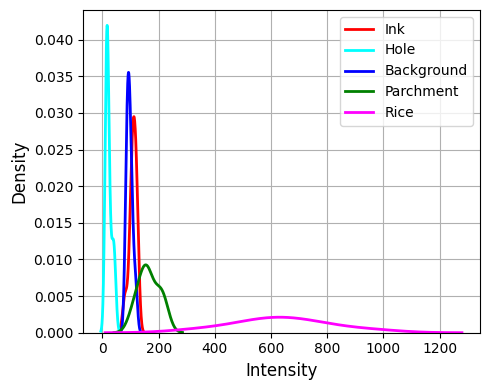

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select all regions to plot and their corresponding colors
selected_regions = {
    "Ink": 'red',
    "Hole": 'cyan',
    "Background": 'blue',
    "Parchment": 'green',
    "Rice": 'magenta'

}

# Specify the band number for which to plot the intensity distribution (12th band)
band_key = f"band_001"
band_image = bands[band_key]

# Create the plot for the 12th band
plt.figure(figsize=(5, 4))

# Plot KDE plots for the selected regions in the 12th band
for region, color in selected_regions.items():
    region_mask = np.zeros(band_image.shape, dtype=bool)
    for (x, y) in regions_coordinates[region]:
        region_mask[y, x] = True

    # Extract the pixel values for the region
    region_values = band_image[region_mask]

    # Plot the KDE curve
    sns.kdeplot(region_values, label=region, color=color, linewidth=2)


plt.xlabel('Intensity', fontsize='larger')
plt.ylabel('Density', fontsize='larger')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


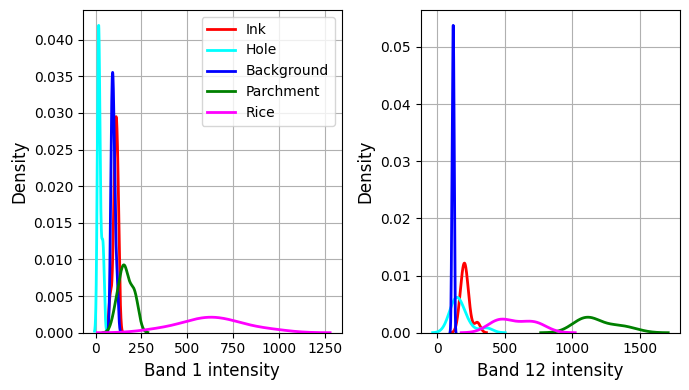

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select all regions to plot and their corresponding colors
selected_regions = {
    "Ink": 'red',
    "Hole": 'cyan',
    "Background": 'blue',
    "Parchment": 'green',
    "Rice": 'magenta'
}

# Define the bands to plot (1st and 12th)
band_keys = [f"band_001", f"band_012"]

# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(7,4))

for idx, band_key in enumerate(band_keys):
    band_image = bands[band_key]

    # Plot KDE plots for each region in the specified band
    for region, color in selected_regions.items():
        region_mask = np.zeros(band_image.shape, dtype=bool)
        for (x, y) in regions_coordinates[region]:
            region_mask[y, x] = True

        # Extract the pixel values for the region
        region_values = band_image[region_mask]

        # Plot the KDE curve
        sns.kdeplot(region_values, label=region if idx == 0 else "", color=color, linewidth=2, ax=axes[idx])

    # Set titles and labels
    axes[idx].set_xlabel(f'Band {11*idx+1} intensity', fontsize='larger')
    axes[idx].set_ylabel('Density', fontsize='larger')
    axes[idx].grid(True)

# Set legend on the first subplot only to avoid redundancy
axes[0].legend()

plt.tight_layout()
plt.show()


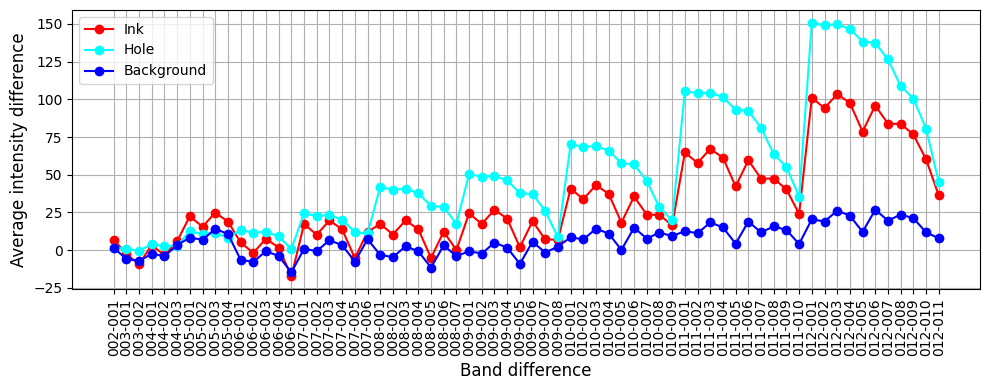

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing cropped band images
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Define coordinate points for each region
regions_coordinates = {
    "Ink": [(1720, 1890), (1500, 1900), (2000, 1890), (1900, 2170), (2000, 1600), (1750, 1900),
            (1700, 2150), (1600, 2270), (1900, 2420), (1800, 2680)],
    "Hole": [(500, 2775), (505, 2777), (1310, 1330), (1305, 1340), (1330, 1400), (2280, 1500),
             (2300, 1530), (2300, 1545), (2275, 825), (2275, 840)],
    "Background": [(2700, 2200), (800, 2700), (100, 2000), (700, 1200), (1400, 800), (2400, 300),
                   (500, 500), (300, 1500), (100, 2500), (1000, 2800)]

}

# Extract the band numbers and sort them
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Calculate intensity trends for each region for each band difference (i-j)
ink_difference_trends = []
hole_difference_trends = []
background_difference_trends = []

for i in range(1, len(band_numbers)):
    for j in range(i):
        band_diff_image = bands[f"band_{band_numbers[i]:03}"] - bands[f"band_{band_numbers[j]:03}"]

        # Collect average pixel values for each band difference
        ink_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Ink"]]
        hole_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Hole"]]
        background_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Background"]]

        ink_difference_trends.append(np.mean(ink_intensity))
        hole_difference_trends.append(np.mean(hole_intensity))
        background_difference_trends.append(np.mean(background_intensity))

# Create x-axis labels for the band differences
band_difference_labels = [f"{band_numbers[i]:03}-{band_numbers[j]:03}" for i in range(1, len(band_numbers)) for j in range(i)]

# Plot the trends for band differences
plt.figure(figsize=(10, 4))
plt.plot(band_difference_labels, ink_difference_trends, label='Ink', color='red', marker='o')
plt.plot(band_difference_labels, hole_difference_trends, label='Hole', color='cyan', marker='o')
plt.plot(band_difference_labels, background_difference_trends, label='Background', color='blue', marker='o')
plt.xlabel('Band difference', fontsize='larger')
plt.ylabel('Average intensity difference', fontsize='larger')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


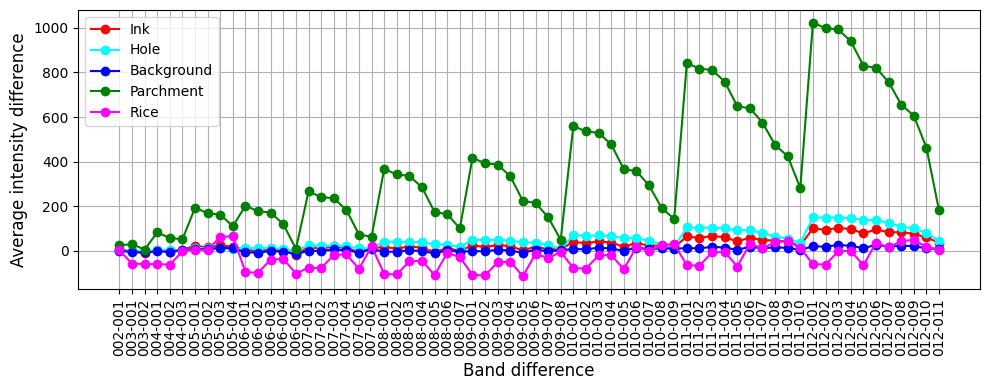

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing cropped band images
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Define coordinate points for each region
regions_coordinates = {
    "Ink": [(1720, 1890), (1500, 1900), (2000, 1890), (1900, 2170), (2000, 1600), (1750, 1900),
            (1700, 2150), (1600, 2270), (1900, 2420), (1800, 2680)],
    "Hole": [(500, 2775), (505, 2777), (1310, 1330), (1305, 1340), (1330, 1400), (2280, 1500),
             (2300, 1530), (2300, 1545), (2275, 825), (2275, 840)],
    "Background": [(2700, 2200), (800, 2700), (100, 2000), (700, 1200), (1400, 800), (2400, 300),
                   (500, 500), (300, 1500), (100, 2500), (1000, 2800)],
    "Parchment": [(1700, 2600), (2400, 2000), (1700, 2800), (1500, 2600), (1100, 1500), (1700, 1200),
                  (1300, 1200), (2800, 1200), (2400, 1700), (2300, 2200)],
    "Rice": [(2300, 800), (2516, 905), (1900, 800), (1400, 1200), (666, 1580), (1340, 2455),
             (1400, 2400), (430, 2415), (345, 2890), (1300, 2100)]
}

# Extract the band numbers and sort them
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Initialize lists to store intensity trends for each band difference
ink_difference_trends = []
hole_difference_trends = []
background_difference_trends = []
parchment_difference_trends = []
rice_difference_trends = []

for i in range(1, len(band_numbers)):
    for j in range(i):
        band_diff_image = bands[f"band_{band_numbers[i]:03}"] - bands[f"band_{band_numbers[j]:03}"]

        # Collect average pixel values for each band difference
        ink_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Ink"]]
        hole_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Hole"]]
        background_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Background"]]
        parchment_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Parchment"]]
        rice_intensity = [band_diff_image[y, x] for (x, y) in regions_coordinates["Rice"]]

        ink_difference_trends.append(np.mean(ink_intensity))
        hole_difference_trends.append(np.mean(hole_intensity))
        background_difference_trends.append(np.mean(background_intensity))
        parchment_difference_trends.append(np.mean(parchment_intensity))
        rice_difference_trends.append(np.mean(rice_intensity))

# Create x-axis labels for the band differences
band_difference_labels = [f"{band_numbers[i]:03}-{band_numbers[j]:03}" for i in range(1, len(band_numbers)) for j in range(i)]

# Plot the trends for band differences
plt.figure(figsize=(10, 4))
plt.plot(band_difference_labels, ink_difference_trends, label='Ink', color='red', marker='o')
plt.plot(band_difference_labels, hole_difference_trends, label='Hole', color='cyan', marker='o')
plt.plot(band_difference_labels, background_difference_trends, label='Background', color='blue', marker='o')
plt.plot(band_difference_labels, parchment_difference_trends, label='Parchment', color='green', marker='o')
plt.plot(band_difference_labels, rice_difference_trends, label='Rice', color='magenta', marker='o')

plt.xlabel('Band difference', fontsize='larger')
plt.ylabel('Average intensity difference', fontsize='larger')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


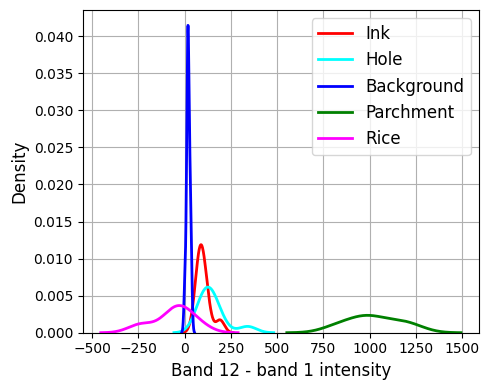

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors for each region
region_colors = {
    "Ink": "red",
    "Hole": "cyan",
    "Background": "blue",
    "Parchment": "green",
    "Rice": "magenta"
}

# Calculate intensity difference between Band 12 and Band 1
band12_image = bands["band_012"]
band1_image = bands["band_001"]
band_diff_image = band12_image - band1_image

# Initialize dictionary to store intensity values for each region for the band difference
region_difference_intensities = {}

for region, coordinates in regions_coordinates.items():
    # Collect pixel values for each region
    region_values = [band_diff_image[y, x] for (x, y) in coordinates]
    region_difference_intensities[region] = region_values

# Plot density curves for each region
plt.figure(figsize=(5, 4))
for region, color in region_colors.items():
    sns.kdeplot(region_difference_intensities[region], label=region, color=color, linewidth=2)

plt.xlabel('Band 12 - band 1 intensity', fontsize='larger')
plt.ylabel('Density', fontsize='larger')
plt.legend(loc='upper right', fontsize='larger')
plt.grid(True)
plt.tight_layout()
plt.savefig('band12_minus_band1_intensity_distribution.png', dpi=300, format='png')
plt.show()


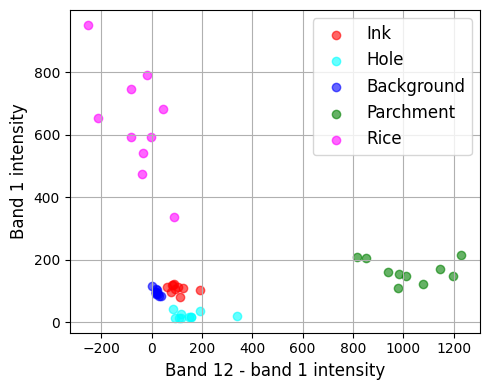

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Define regions and colors
regions = ["Ink", "Hole", "Background", "Parchment", "Rice"]
region_colors = {
    "Ink": "red",
    "Hole": "cyan",
    "Background": "blue",
    "Parchment": "green",
    "Rice": "magenta"
}

# Load band 1 and band difference (band12 - band1)
band1_image = bands["band_001"]
band12_image = bands["band_012"]
band_diff_image = band12_image - band1_image

# Prepare figure
plt.figure(figsize=(5,4))

# Plot data for each region
for region in regions:
    color = region_colors[region]

    # Extract intensity values for Band 1 and Band 12 - Band 1 difference for each region
    band1_values = np.array([band1_image[y, x] for (x, y) in regions_coordinates[region]])
    band_diff_values = np.array([band_diff_image[y, x] for (x, y) in regions_coordinates[region]])

    # Scatter plot of Band 12 - Band 1 (x-axis) vs Band 1 (y-axis)
    plt.scatter(band_diff_values, band1_values, color=color, label=region, alpha=0.6)

# Labeling and legend
plt.xlabel('Band 12 - band 1 intensity', fontsize='larger')
plt.ylabel('Band 1 intensity', fontsize='larger')
plt.legend(loc='upper right', fontsize='larger')
plt.grid(True)
plt.tight_layout()
plt.savefig('band12_minus_band1_versus_band_1_intensity_distribution.png', dpi=300, format='png')
plt.show()


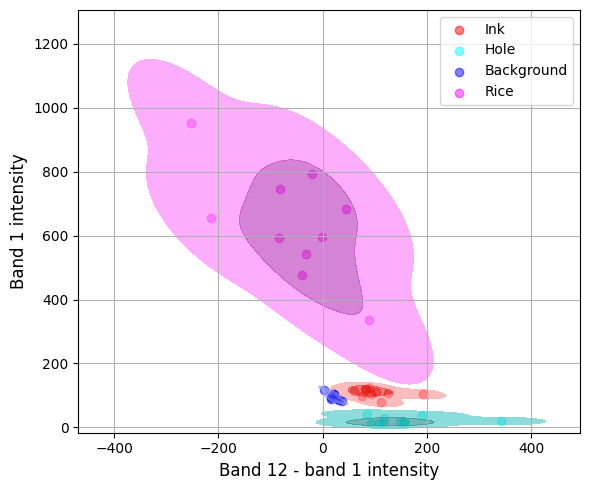

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define regions and colors
regions = ["Ink", "Hole", "Background", "Rice"]
region_colors = {
    "Ink": "red",
    "Hole": "cyan",
    "Background": "blue",
    "Rice": "magenta"
}

# Load band 1 and band difference (band12 - band1)
band1_image = bands["band_001"]
band12_image = bands["band_012"]
band_diff_image = band12_image - band1_image

# Prepare figure
plt.figure(figsize=(6,5))

# Plot data for each region with density contours
for region in regions:
    color = region_colors[region]

    # Extract intensity values for Band 1 and Band 12 - Band 1 difference for each region
    band1_values = np.array([band1_image[y, x] for (x, y) in regions_coordinates[region]])
    band_diff_values = np.array([band_diff_image[y, x] for (x, y) in regions_coordinates[region]])

    # Scatter plot of Band 12 - Band 1 (x-axis) vs Band 1 (y-axis)
    plt.scatter(band_diff_values, band1_values, color=color, label=region, alpha=0.5)

    # Overlay KDE (heatmap-like contour) for the region
    sns.kdeplot(x=band_diff_values, y=band1_values, color=color, levels=3, fill=True, alpha=0.6)

# Set plot details
plt.xlabel('Band 12 - band 1 intensity', fontsize='larger')
plt.ylabel('Band 1 intensity', fontsize='larger')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.feature_selection import f_classif

# Paths to the folders
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'
ink_masks_dir = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/ink_masks"

# Load the ink mask
ink_mask = cv2.imread(os.path.join(ink_masks_dir, "124_001.png"), cv2.IMREAD_GRAYSCALE)

# Load band images and store them in a dictionary
bands = {}
for filename in sorted(os.listdir(cropped_dir)):
    if filename.endswith('.tif'):
        band_number = filename.split('_')[-1].split('.')[0]  # Extract band number
        image_path = os.path.join(cropped_dir, filename)
        bands[f"band_{band_number}"] = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float64)

# Create a non-ink mask
non_ink_mask = np.where(ink_mask > 0, 0, 1).astype(np.uint8)  # Invert ink_mask to create non-ink mask

# Extract pixel values for ink and non-ink regions
ink_pixel_values = {}
non_ink_pixel_values = {}

for feature_name, image in bands.items():
    ink_pixel_values[feature_name] = image[ink_mask > 0]
    non_ink_pixel_values[feature_name] = image[non_ink_mask > 0]






In [ ]:
cropped_dir = '/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/cropped_124_001'
parchment_masks_dir = "/content/drive/MyDrive/Colab Notebooks/icdar_ijdar_2025/parchment_masks"

# Load the parchment mask
parchment_mask = cv2.imread(os.path.join(parchment_masks_dir, "124_001.png"), cv2.IMREAD_GRAYSCALE)

# Create a non-parchment mask
non_parchment_mask = np.where(parchment_mask > 0, 0, 1).astype(np.uint8)  # Invert parchment_mask to create non-parchment mask

# Extract pixel values for parchment and non-parchment regions
parchment_pixel_values = {}
non_parchment_pixel_values = {}

for feature_name, image in bands.items():
    parchment_pixel_values[feature_name] = image[parchment_mask > 0]
    non_parchment_pixel_values[feature_name] = image[non_parchment_mask > 0]

In [ ]:
# Generate band differences where the first band number is greater than the second
band_differences = {}
band_keys = sorted(bands.keys())

for i in range(1, len(band_keys)):  # Start from 1 to ensure i > j
    for j in range(i):
        band_differences[f"{band_keys[i]}-{band_keys[j]}"] = bands[band_keys[i]] - bands[band_keys[j]]

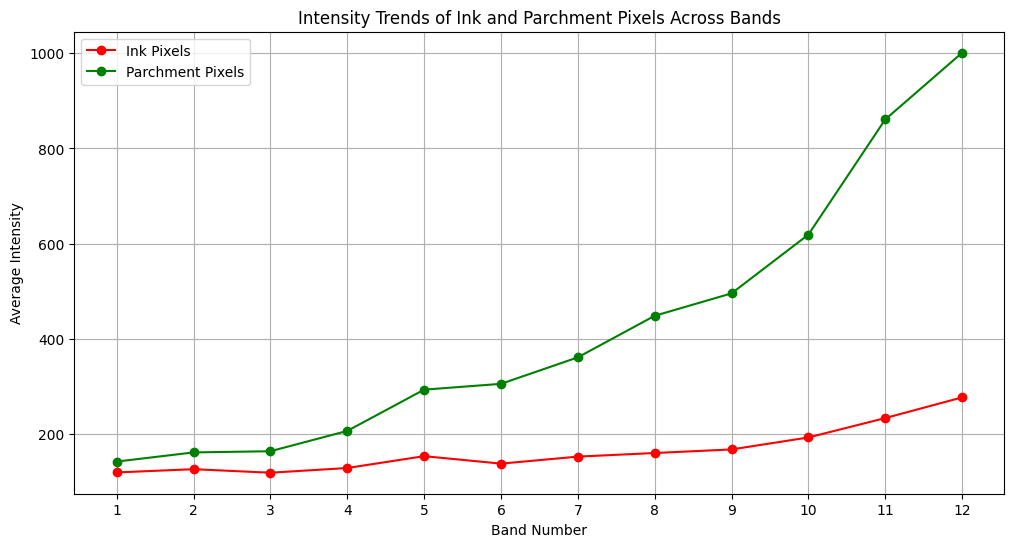

In [ ]:
import matplotlib.pyplot as plt

# Extract the band numbers and convert them to integers for sorting
band_numbers = sorted([int(band.split('_')[-1]) for band in bands.keys()])

# Initialize arrays to store average pixel intensities for each band for ink and parchment
ink_intensity_trends = []
parchment_intensity_trends = []

# Calculate the average pixel intensity for each band in the ink and parchment regions
for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    ink_intensity_trends.append(np.mean(bands[band_key][ink_mask > 0]))
    parchment_intensity_trends.append(np.mean(bands[band_key][parchment_mask > 0]))

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(band_numbers, ink_intensity_trends, label='Ink Pixels', color='red', marker='o')
plt.plot(band_numbers, parchment_intensity_trends, label='Parchment Pixels', color='green', marker='o')
plt.xlabel('Band Number')
plt.ylabel('Average Intensity')
plt.title('Intensity Trends of Ink and Parchment Pixels Across Bands')
plt.xticks(band_numbers)  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()


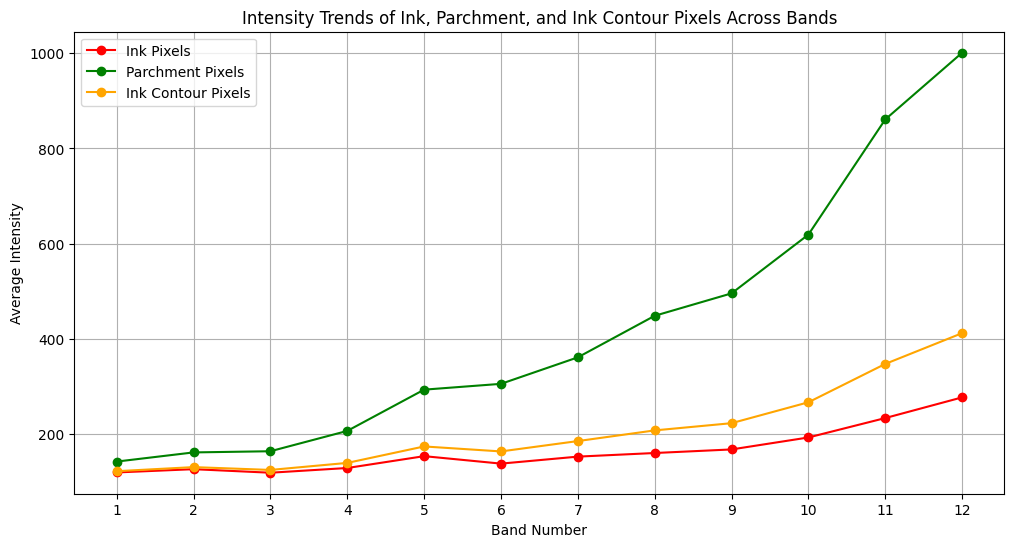

In [ ]:
# Create the contour mask with the correct data type (uint8)
contour_mask = np.zeros_like(ink_mask, dtype=np.uint8)
contours, _ = cv2.findContours(ink_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(contour_mask, contours, -1, color=255, thickness=1)

# Calculate the average pixel intensity for each band in the ink contour regions
ink_contour_intensity_trends = []

for band_number in band_numbers:
    band_key = f"band_{band_number:03}"
    ink_contour_intensity_trends.append(np.mean(bands[band_key][contour_mask == 255]))

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(band_numbers, ink_intensity_trends, label='Ink Pixels', color='red', marker='o')
plt.plot(band_numbers, parchment_intensity_trends, label='Parchment Pixels', color='green', marker='o')
plt.plot(band_numbers, ink_contour_intensity_trends, label='Ink Contour Pixels', color='orange', marker='o')
plt.xlabel('Band Number')
plt.ylabel('Average Intensity')
plt.title('Intensity Trends of Ink, Parchment, and Ink Contour Pixels Across Bands')
plt.xticks(band_numbers)  # Ensure all band numbers are shown on the x-axis
plt.legend()
plt.grid(True)
plt.show()


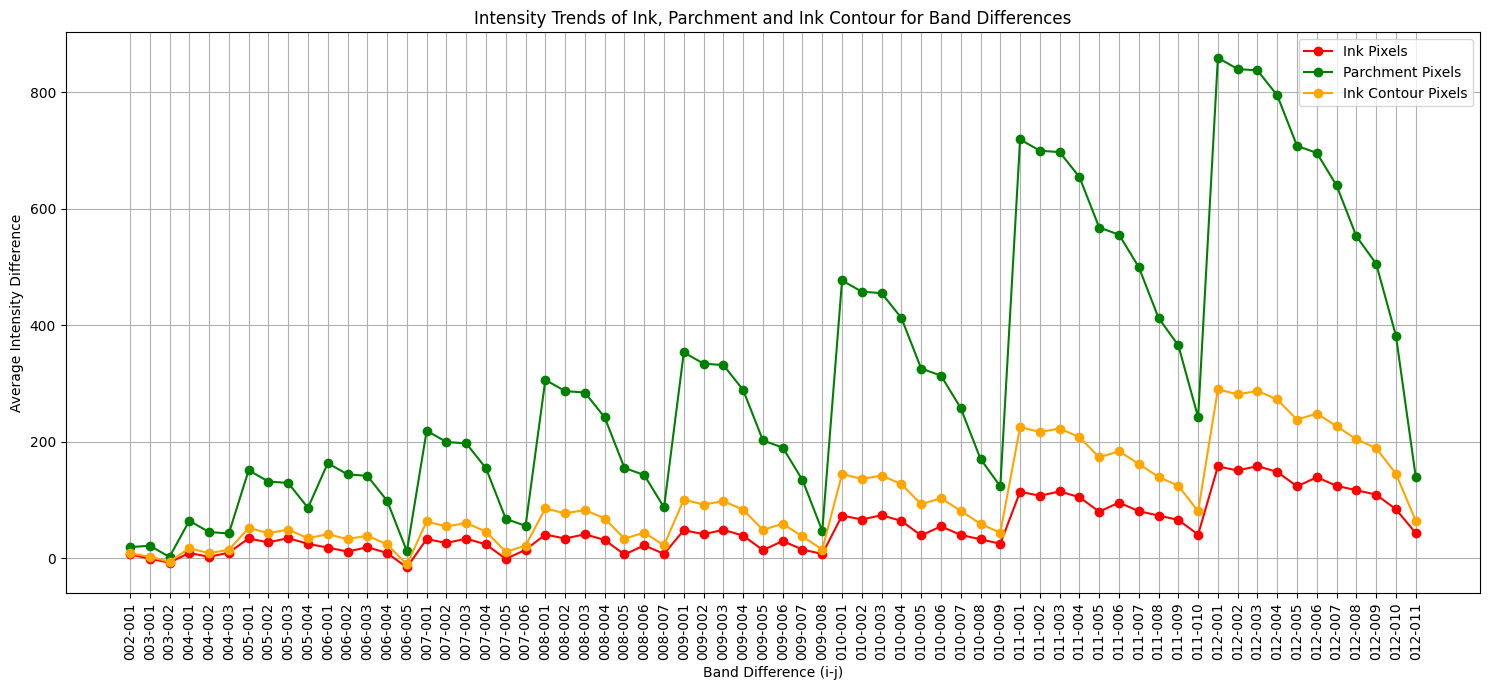

In [ ]:
# Calculate the average pixel intensity for each band difference for ink, parchment, and other pixels
ink_difference_trends = []
parchment_difference_trends = []
ink_contour_difference_trends = []

# Generate band differences where the first band number is greater than the second (i > j)
for i in range(1, len(band_numbers)):
    for j in range(i):
        band_key_diff = f"band_{band_numbers[i]:03}-band_{band_numbers[j]:03}"
        band_diff_image = bands[f"band_{band_numbers[i]:03}"] - bands[f"band_{band_numbers[j]:03}"]

        # Append the average intensity for each region for the band difference
        ink_difference_trends.append(np.mean(band_diff_image[ink_mask > 0]))
        parchment_difference_trends.append(np.mean(band_diff_image[parchment_mask > 0]))
        ink_contour_difference_trends.append(np.mean(band_diff_image[contour_mask == 255]))

# Create x-axis labels for the band differences
band_difference_labels = [f"{band_numbers[i]:03}-{band_numbers[j]:03}" for i in range(1, len(band_numbers)) for j in range(i)]

# Plot the trends for band differences
plt.figure(figsize=(15, 7))
plt.plot(band_difference_labels, ink_difference_trends, label='Ink Pixels', color='red', marker='o')
plt.plot(band_difference_labels, parchment_difference_trends, label='Parchment Pixels', color='green', marker='o')
plt.plot(band_difference_labels, ink_contour_difference_trends, label='Ink Contour Pixels', color='orange', marker='o')
plt.xlabel('Band Difference (i-j)')
plt.ylabel('Average Intensity Difference')
plt.title('Intensity Trends of Ink, Parchment and Ink Contour for Band Differences')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
